<h1><a href url="www.cmotions.nl">Cmotions</a> Dataviz tutorial</h1>

In this tutorial we will show you the functionality of the Cmotions Dataviz package. The goal of this tutorial is to give you an idea of the functionality of this package, and to provide you with a template to use for yourself. 

<b>Input:</b>
<br> 
    - a dataset
<br>
<b>Output:</b>
<br>
    - a visualization of your data <br>
<br>
<b>Steps:</b>
<br>
    1. Load the packages<br>
    2. Load data<br>
    3. Create plot(s)<br>

In [1]:
from pydataset import data
import cmo_dataviz as dv
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [2]:
# import your own stylesheet if relevant
dv.import_style('mydocuments/mystylesheet.mplstyle')

In [3]:
df = data('iris')
df_summary = df.groupby('Species').agg({'Sepal.Length': 'mean','Sepal.Width': 'sum', 'Petal.Length': 'mean', 'Petal.Width': 'sum'}).reset_index()
df_summary.head()

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,5.006,171.4,1.462,12.3
1,versicolor,5.936,138.5,4.260,66.3
2,virginica,6.588,148.7,5.552,101.3


In [2]:
networkdata = {
    'source': ['A', 'B', 'C', 'D', 'E', 'B', 'C', 'C', 'C'],
    'target': ['B', 'C', 'D', 'E', 'A', 'D', 'E', 'D', 'D'],
    'label': ['relation1', 'relation2', 'relation3', 'relation4', 'relation5', 'relation6', 'relation7', 'relation8', 'relation9']
}
networkdata = pd.DataFrame(networkdata)
networkdata

,source,target,label
0,A,B,relation1
1,B,C,relation2
2,C,D,relation3
3,D,E,relation4
4,E,A,relation5
5,B,D,relation6
6,C,E,relation7
7,C,D,relation8
8,C,D,relation9


There are several ways to use the plot functions from cmo_dataviz. If you simply want to have a graph and don't really care about the size or to combine it with other graphs. The easiest is to simply call the plot function you need, by default these plots will be (10,10) in size.  

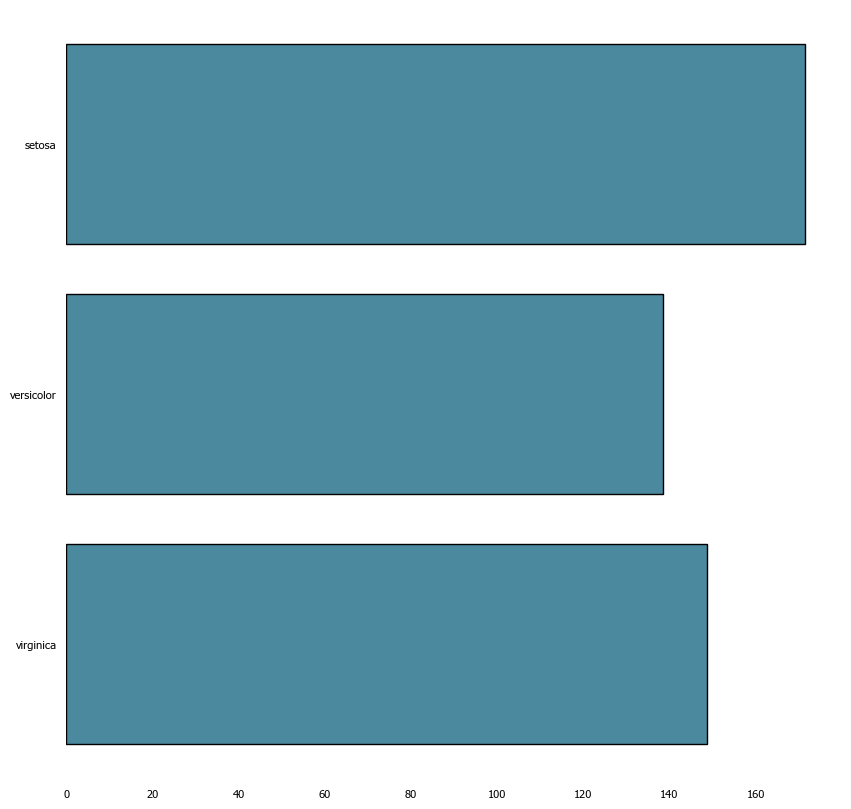

In [5]:
dv.create_horizontal_barplot(data=df_summary, x_var='Sepal.Width', y_var='Species', x_label="", title="", ax=None)
plt.show()

Or resize the plot by using the figsize parameter

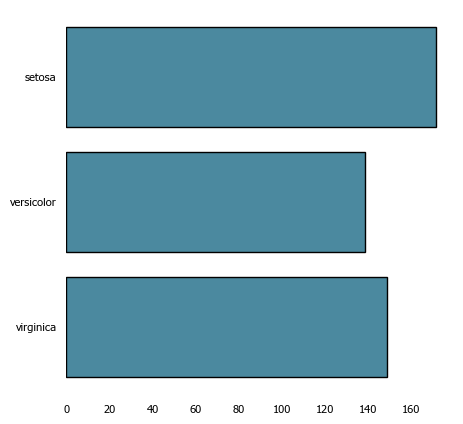

In [6]:
dv.create_horizontal_barplot(data=df_summary, x_var='Sepal.Width', y_var='Species', x_label="", title="", figsize=(5,5), ax=None)
plt.show()

If you want to create a figure with multiple graphs, you start by defining this figure and then adding all the graphs one by one.

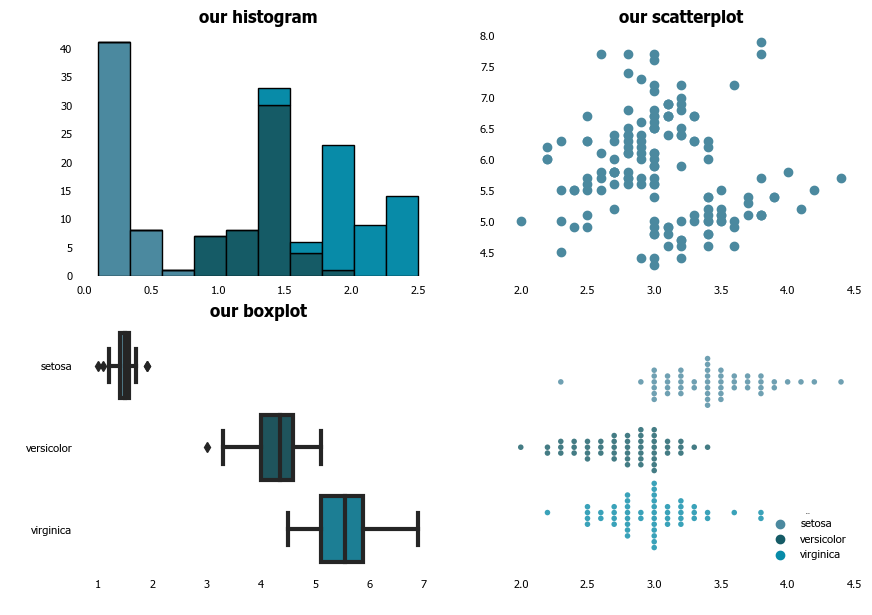

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(10,7))
dv.create_histogram(data=df, var="Petal.Width", color_by="Species", bins=10, max_categories=50, ax=ax[0,0], title="our histogram")
dv.create_scatterplot(data=df, x_var="Sepal.Width", y_var="Sepal.Length", title="our scatterplot", ax=ax[0,1])
dv.create_boxplot(data=df, x_var="Petal.Length", y_var="Species", color_by=None, ax=ax[1,0], title="our boxplot")
dv.create_swarmplot(data=df, x_var="Sepal.Width", y_var=None, color_by= "Species", ax=ax[1,1])
plt.show()

You can also create a network graph, play around with different values for the seed to get the best looking result for your own data

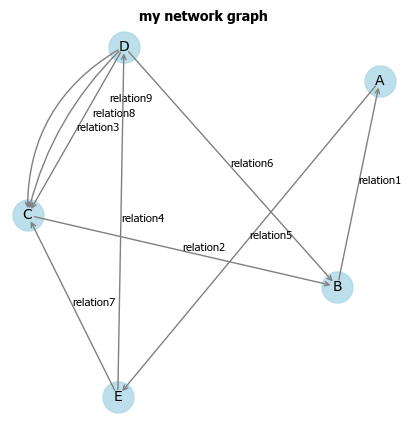

In [8]:
_ = dv.create_network_graph(
    data=networkdata,
    node_1='source',
    node_2='target',
    edge_label='label',
    title="my network graph",
    figsize=(5, 5),
    ax=None,
    seed=1502)
plt.show()